<a href="https://colab.research.google.com/github/hyperdbio/Android-inject/blob/master/%EC%84%A0%ED%98%95%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 선형분류
- 선형분류란 선형 모델을 사용하여 범주형 데이터를 예측하는 분류
모델
- 일반적인 선형 함수를 사용할 경우에는 값을 그대로 사용할 수 없기 때문에 시그모이드 함수를 사용하여 예측을 진행

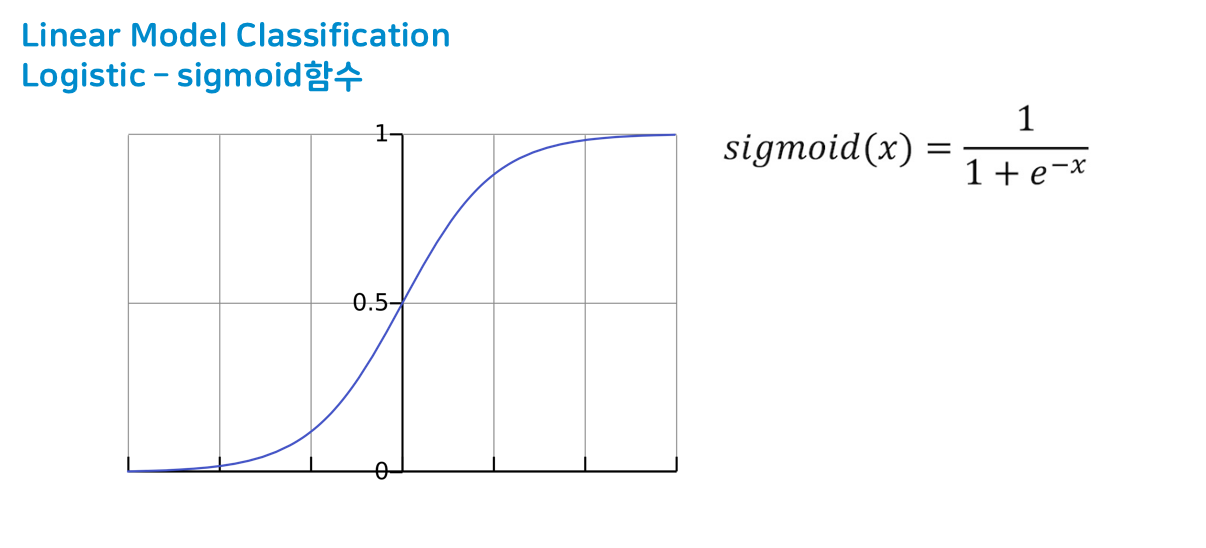

### 오차 계산방법
- 교차엔트로피 오차(cross entropy error)
- 실제값이 1일 때 1에 가까울 수록 오차가 작고 0에 가까울 수록
오차가 극대화 됨
- 실제값이 0일 때 0에 가까울 수록 오차가 작고 1에 가까울 수록 오차가 극대화 됨

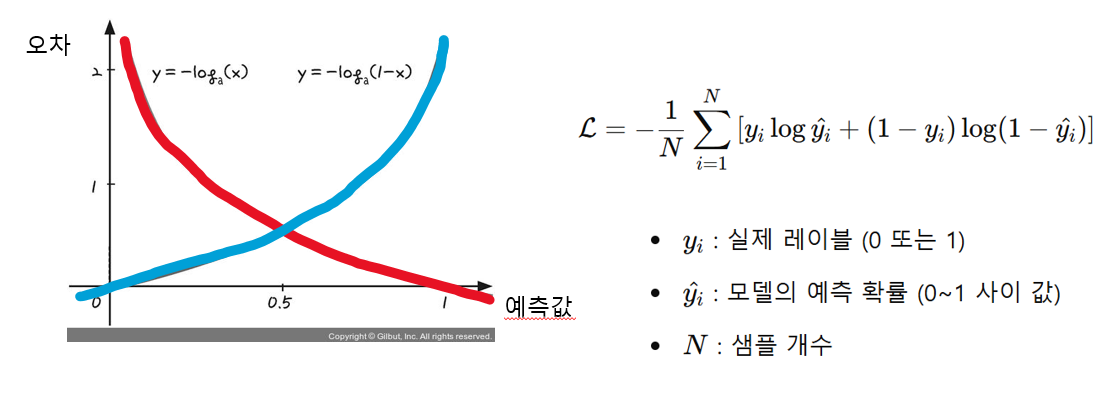

### 선형 분류 모델 사용
- 선형 분류모델을 사용하여 와인을 분류하는 실습을 진행해보자.
- Logistic Regression(로지스틱 회귀 -> 분류), SVM(서포트 벡터 머신)등 이용하여 선형 분류모델 사용해보기

In [ ]:
# 와인 정보를 토대로 레드, 화이트 와인인지 분류하는 실습을 진행해보자!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


| 컬럼 이름             | 설명                             |
|----------------------|---------------------------------|
| fixed acidity        | 고정 산도 (타르타르산 같은 비휘발성 산의 양) |
| volatile acidity     | 휘발성 산도 (와인의 향에 영향을 주는 아세트산의 양) |
| citric acid          | 구연산의 양 (와인의 신선함에 영향을 줌) |
| residual sugar       | 잔류 설탕량 (발효 후 남은 설탕의 양) |
| chlorides            | 염화물의 양 (와인의 소금기에 영향을 줌) |
| free sulfur dioxide  | 유리 이산화황의 양 (와인을 신선하게 보존하는 데 도움) |
| total sulfur dioxide | 총 이산화황의 양 (발효 과정과 와인의 보존에 중요) |
| density              | 밀도 (와인의 알코올 함량과 설탕량에 영향을 받음) |
| pH                   | pH 수치 (와인의 산성도를 나타냄) |
| sulphates            | 황산염의 양 (와인의 발효 과정과 저장 기간에 영향) |
| alcohol              | 알코올 함량 (와인의 도수) |
| quality              | 품질 (와인의 전반적인 품질을 나타내는 등급) |
| color                | 색 (와인의 색상을 나타내는 지표, 예: 레드(0), 화이트(1)) |

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [ ]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [ ]:
# 상관관계
wine.corr()['color']

,color
fixed acidity,0.486740
volatile acidity,0.653036
citric acid,-0.187397
residual sugar,-0.348821
chlorides,0.512678
free sulfur dioxide,-0.471644
total sulfur dioxide,-0.700357
density,0.390645
pH,0.329129
sulphates,0.487218


### 이상치 찾는 방법 (IQR)
- 4분위수를 이용하여 이상치를 찾는 방법
- IQR = Q3 - Q1 (75% - 25%)
- 이상치 탐지를 위해 상한선과 하한선의 기준을 설정
 - 상한선 : Q3 + IQR*1.5 -> 상한선보다 클 경우 이상치로 간주
 - 하한선 : Q1 - IQR*1.5 -> 하한선보다 작을 경우 이상치로 간주



### 전처리 단계
- 원래는 데이터를 전처리를 진행하고 EDA를 통해 데이터의 특성이나 패턴을 파악하여 가공을 진행해야 한다.
- 스케일링, 상관관계 분석, 이상치 처리등 여러가지 작업을 실시

In [ ]:
# 전처리를 했다고 가정하고 데이터 스케일링 진행
# 주의사항
# 데이터의 전처리 마지막에 사용
# 결측치가 있으면 안됨!
# 스케일링을 도와주는 도구 불러오기
from sklearn.preprocessing import StandardScaler

In [ ]:
# 인덱싱, 슬라이싱을 통해 정답데이터와 문제데이터를 나누기
# 문제데이터
X = wine.iloc[:,:-1]
# 정답데이터
y = wine.iloc[:,-1]

In [ ]:
# 스캐일러 객체 생성
standard = StandardScaler()

In [ ]:
standard.fit(X)

StandardScaler()

In [ ]:
X_trans = standard.transform(X)
X_trans

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813, -0.93722961],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416,  0.20799905],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 ,  1.35322771],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202,  0.20799905]])

In [ ]:
# 학습용 데이터와 평가용 데이터로 분리 작업 실시
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3, random_state=5)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4547, 12)
(1950, 12)
(4547,)
(1950,)


### Logistic Regression(로지스틱 회귀, 분류모델)
- 시그모이드 함수를 사용 -> 0~1사이의 값으로 반환
- 오차계산방법 : Cross Entropy
- 기울기를 계산 후 파라미터 값을 업데이트 하여 오차가 최소가 되는 값을 찾아 계속해서 학습을 진행한다.


In [ ]:
# 모델 도구 불러오기
from sklearn.linear_model import LogisticRegression

In [ ]:
# 모델 객체 생성
lr_model = LogisticRegression(
    max_iter = 1000
)
# max_iter : 최대 학습 회수를 제한

In [ ]:
# 학습 진행
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# 평가
lr_model.score(X_test, y_test)

0.9907692307692307

### 혼동행렬
- TN(True Negative) : 실제 음성데이터를 모델이 음성이라고 예측한 경우 (예측 성공)
- FP(False Positive) : 실제 음성데이터를 모델이 양성이라고 예측한 경우 (예측 실패)
- FN(False Negative) : 실제 양성데이터를 모델이 음성이라고 예측한 경우 (예측 실패)
- TP(True Positive) : 실제 양성데이터를 모델이 양성이라고 예측한 경우 (예측 성공)

### 정확도(Accuracy)
- 전체중에 정확히 맞춘 비율
- 불균형한 데이터가 들어있을 경우 정확도로 성능을 평가할 때 문제가 생길 수 있음
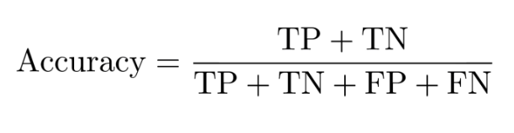

### 재현율(Recall)
- 실제 양성 데이터 중 모델이 얼마나 양성을 찾아냈는지를 평가하는 방법
- 양성데이터를 음성이라고 잘못 예측하는 경우를 줄여야 할 때 주로 확인해야하는 평가지표


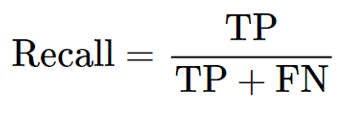

### 정밀도(Precision)
- 모델이 양성이라고 예측한 데이터 중 실제 양성데이터인 경우를 평가하는 방법
- 음성데이터를 양성이라고 잘못 예측한 경우를 줄여야 할 때 주로 확인해야하는 평가지표

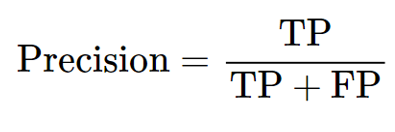

### F1-score
- 정밀도와 재현율을 적절하게 확인하는 평가지표

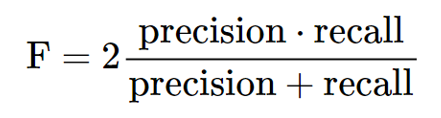

### 평가지표 정리
- 일반적으로 높은 정확도를 가진 모델을 선호한다. 하지만 불균형한 데이터에 대해서는 정확도만을 가지고 평가를 하는것은 좋은 방법이 아니다.
- 재현율과 정밀도를 적절하게 확인해야 한다.
- 재현율이 높은 경우는 실제 양성을 모델이 놓치지 않는 것을 의미
- 정밀도가 높은 경우는 양성이라고 분류한 경우 실제 양성일 확률이 높다는 것을 의미한다.
- f1-score란 정밀도와 재현율의 조화 평균이다.
- f1-score가 높은 경우는 두 지표가 한쪽으로 치우치지 않고, 어느정도 잘 식별하는 것을 의미한다.

In [ ]:
# 분류 평가지표 도구 불러오기
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# X_test 데이터 예측
y_pred = lr_model.predict(X_test)

In [ ]:
# 정확도 확인
accuracy_score(y_test, y_pred)

0.9907692307692307

In [ ]:
# 재현율 확인
recall_score(y_test, y_pred)

0.9826086956521739

In [ ]:
# 정밀도 확인
precision_score(y_test, y_pred)

0.9783549783549783

In [ ]:
# f1스코어 확인
f1_score(y_test, y_pred)

0.9804772234273319

In [ ]:
# 서포트 벡터 머신
# 도구 불러오기
from sklearn.svm import SVC

In [ ]:
# 모델 객체 생성
svc_model = SVC(max_iter = 1000)

In [ ]:
svc_model.fit(X_train, y_train)

SVC(max_iter=1000)

In [ ]:
# 모델 평가(정확도)
svc_model.score(X_test, y_test)

0.9964102564102564

In [ ]:
# 예측
y_svc_pred = svc_model.predict(X_test)

In [ ]:
# 정밀도
precision_score(y_test, y_svc_pred)

1.0

In [ ]:
# 재현율
recall_score(y_test, y_svc_pred)

0.9847826086956522